In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file1 = 'train.csv'
df1 = pd.read_csv(file1)
#df1

In [3]:
file1 = 'test.csv'
df2 = pd.read_csv(file1)
#df2

In [4]:
df = pd.concat([df1, df2])
df= df.reset_index(drop=True)
df = df.drop(columns =['Unnamed: 0'])

In [5]:
# There is no missing value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [6]:
# There is no ID more than once.
df['id'].unique().shape

# We can drop the column 'id'
df = df.drop(columns='id')

### Satisfaction

This is our target.

In [7]:
# The target is categorical.
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

We will need to encode the target with numbers.

Let's check whether the dataset is balanced or not.

In [8]:
# This part of code is from Xuan's notebook (Scikit-learn Pipeline Demo.ipynb)
def check_data_balance(series, style="seaborn-pastel"):
    with plt.style.context(style):
        unique = series.value_counts()
        display(unique) #show unique value counts of the target
        plt.pie(unique, explode=[0.05]*len(unique), labels=unique.index, autopct='%1.1f%%'); #plot a pie chart for the target to see if data are balanced

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

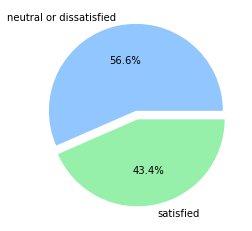

In [9]:
# It's not a perfectly balanced dataset, but it's close to 50%-50%.
check_data_balance(df["satisfaction"])

### Gender

In [10]:
# Gender is a categorical variable
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

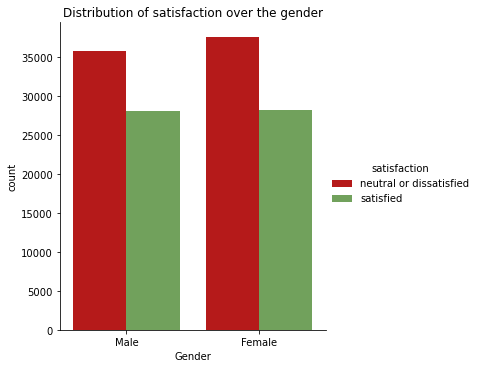

In [11]:
colors = ["#cf0000", "#6dad50"]
sns.set_palette(sns.color_palette(colors))

ax = sns.catplot(kind='count', x='Gender', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the gender')

We will need to encode this column with numbers.

### Customer Type

In [12]:
# Custumer Type is a categorical variable
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

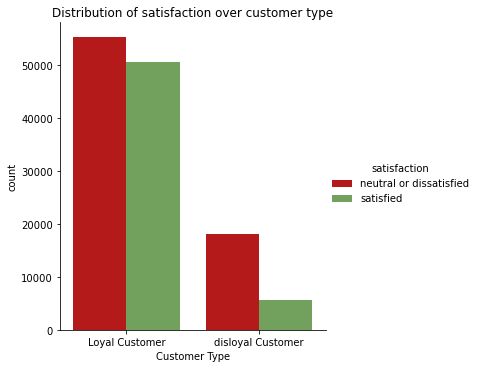

In [13]:
ax = sns.catplot(kind='count', x='Customer Type', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over customer type')

We will need to encode this column with numbers.

### Age

In [14]:
# Age is a discret variable
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

In the pipeline, we will need to transform this column with MinMaxScaler.

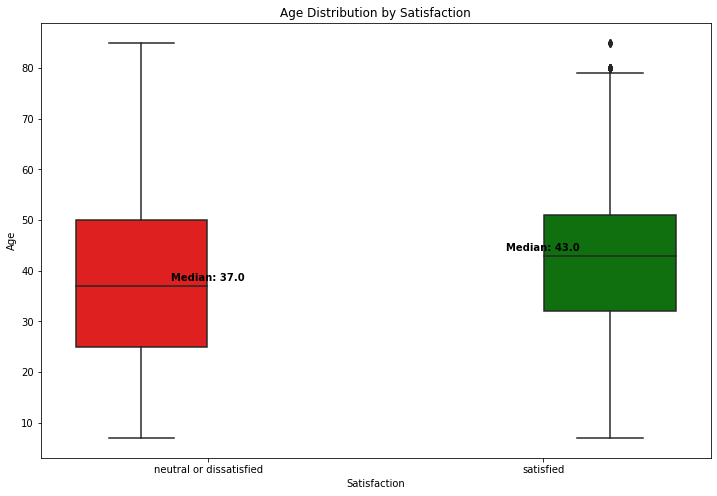

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define custom colors
palette = {"neutral or dissatisfied": "red", "satisfied": "green"} # Adjust as per your data

# Create a box plot with custom colors
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='satisfaction', y='Age', data=df, palette=palette, hue='satisfaction')

# Check if the legend exists, then remove it
if ax.legend_:
    ax.legend_.remove()

plt.title('Age Distribution by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Age')

# Calculate the median age for each satisfaction category
medians = df.groupby(['satisfaction'])['Age'].median().to_dict()

# Annotate the median values on the boxplot
for label, median in medians.items():
    plt.text(
        x=np.arange(len(medians))[list(medians).index(label)], 
        y=median + 1,  # Adjust this offset as needed
        s=f"Median: {median}",
        horizontalalignment='center',
        color='black',
        weight='semibold'
    )

plt.show()


### Type of Travel

In [16]:
# Type of Travel is a categorical variable.
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

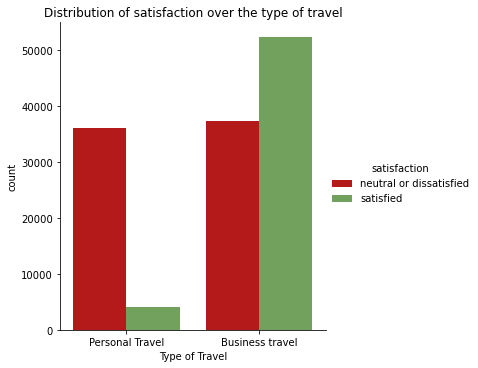

In [17]:
ax = sns.catplot(kind='count', x='Type of Travel', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the type of travel')

We will need to encode this column with numbers.

### Class

In [18]:
# Class is a categorical variable.
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

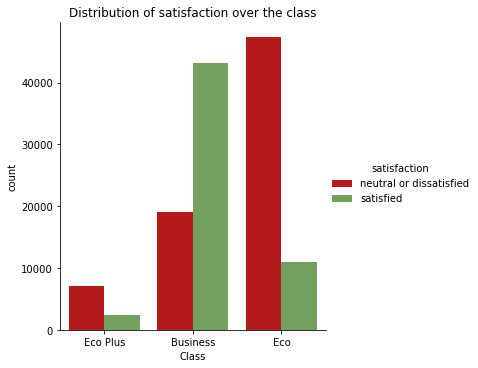

In [19]:
ax = sns.catplot(kind='count', x='Class', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the class')

We will need to encode this column with numbers.

### Flight distance

In [20]:
# Flight Distance is a discret variable.
df['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In the pipeline, we will need to transform this column with MinMaxScaler.

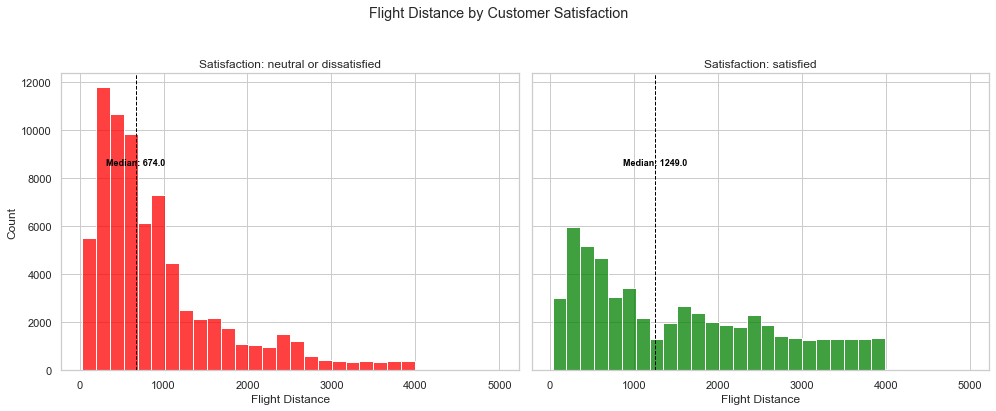

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Assign each satisfaction level to a subplot
satisfaction_levels = df['satisfaction'].unique()
colors = {'neutral or dissatisfied': 'red', 'satisfied': 'green'}  # Define your colors

for ax, satisfaction in zip(axes, satisfaction_levels):
    subset = df[df['satisfaction'] == satisfaction]
    sns.histplot(subset, x='Flight Distance', ax=ax, color=colors[satisfaction], bins=30, kde=False)
    ax.set_title(f'Satisfaction: {satisfaction}')
    ax.axvline(subset['Flight Distance'].median(), color='black', linestyle='dashed', linewidth=1)
    ax.text(subset['Flight Distance'].median(), ax.get_ylim()[1]*0.7, f'Median: {subset["Flight Distance"].median()}',
            ha='center', va='center', color='black', weight='semibold', fontsize=9)

# Set common labels
fig.suptitle('Flight Distance by Customer Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Count')

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make space for the common title
plt.show()


### Inflight wifi service

In [22]:
# Inflight wifi service is an ordinal variable.
df['Inflight wifi service'].unique()

array([3, 2, 4, 1, 5, 0])

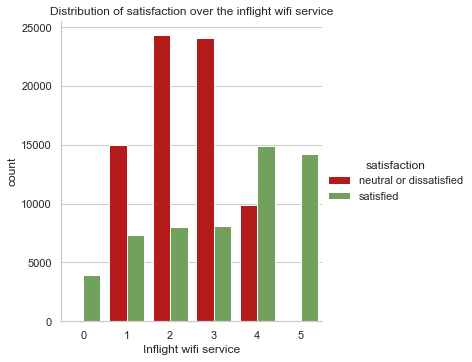

In [23]:
colors = ["#cf0000", "#6dad50"]
sns.set_palette(sns.color_palette(colors))

ax = sns.catplot(kind='count', x='Inflight wifi service', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the inflight wifi service')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Departure/Arrival time convenient

In [24]:
# Departure/Arrival time convenient is an ordinal variable.
df['Departure/Arrival time convenient'].unique()

array([4, 2, 5, 3, 1, 0])

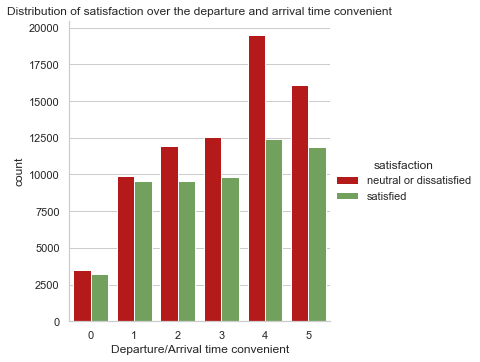

In [25]:
ax = sns.catplot(kind='count', x='Departure/Arrival time convenient', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the departure and arrival time convenient')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Ease of Online booking

In [26]:
# Ease of Online booking is an ordinal variable.
df['Ease of Online booking'].unique()

array([3, 2, 5, 4, 1, 0])

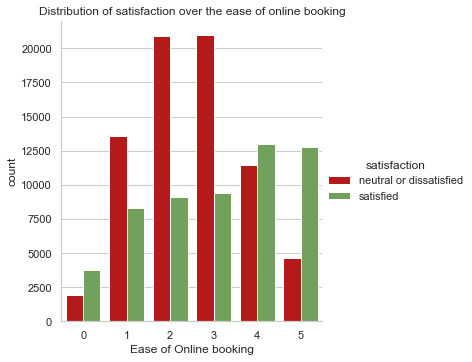

In [27]:
ax = sns.catplot(kind='count', x='Ease of Online booking', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the ease of online booking')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Gate location

In [28]:
# Gate location is an ordinal variable.
df['Gate location'].unique()

array([1, 3, 2, 5, 4, 0])

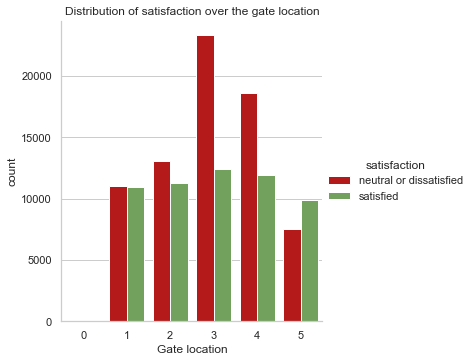

In [29]:
ax = sns.catplot(kind='count', x='Gate location', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the gate location')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Food and drink

In [30]:
# Food and drink is an ordinal variable.
df['Food and drink'].unique()

array([5, 1, 2, 4, 3, 0])

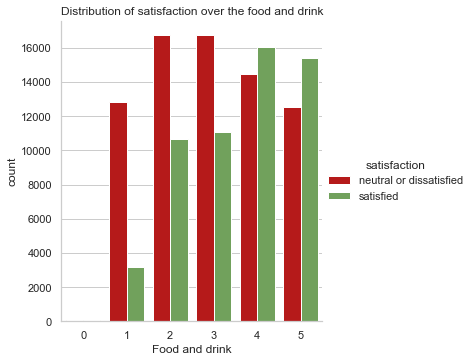

In [31]:
ax = sns.catplot(kind='count', x='Food and drink', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the food and drink')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Online boarding

In [32]:
# Online boarding is an ordinal variable.
df['Online boarding'].unique()

array([3, 5, 2, 1, 4, 0])

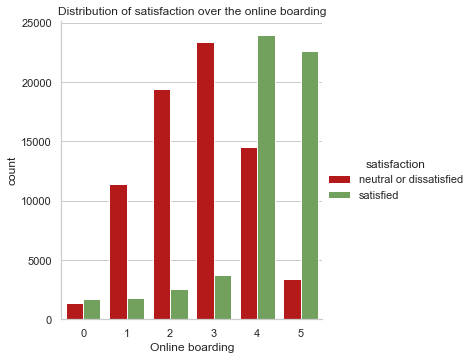

In [33]:
ax = sns.catplot(kind='count', x='Online boarding', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the online boarding')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Seat comfort

In [34]:
# Seat comfort is an ordinal variable.
df['Seat comfort'].unique()

array([5, 1, 2, 3, 4, 0])

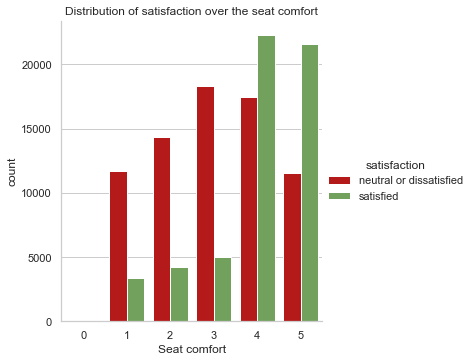

In [35]:
ax = sns.catplot(kind='count', x='Seat comfort', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the seat comfort')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Inflight entertainment

In [36]:
# Inflight entertainment is an ordinal variable.
df['Inflight entertainment'].unique()

array([5, 1, 2, 3, 4, 0])

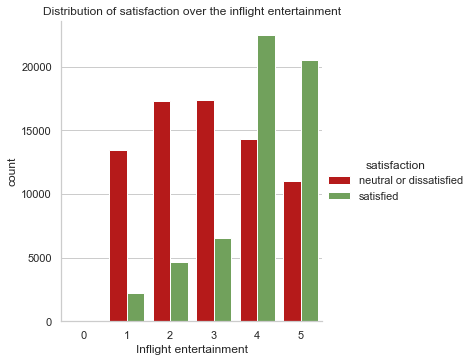

In [37]:
ax = sns.catplot(kind='count', x='Inflight entertainment', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the inflight entertainment')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### On-board service

In [38]:
# On-board service is an ordinal variable.
df['On-board service'].unique()

array([4, 1, 2, 3, 5, 0])

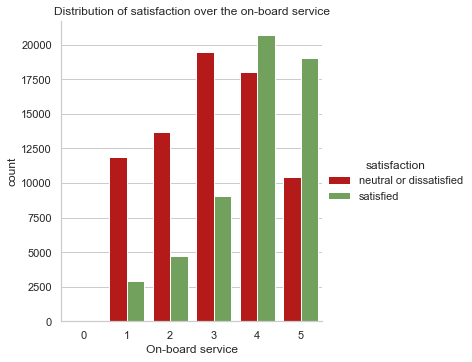

In [39]:
ax = sns.catplot(kind='count', x='On-board service', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the on-board service')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Leg room service

In [40]:
# Leg room service is an ordinal variable.
df['Leg room service'].unique()

array([3, 5, 4, 2, 1, 0])

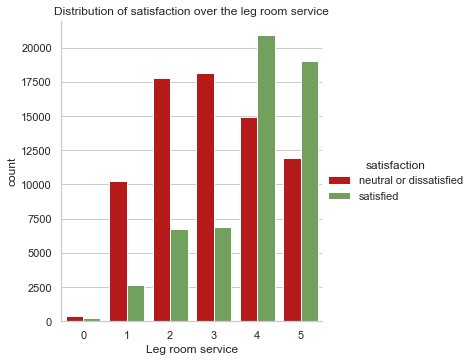

In [41]:
ax = sns.catplot(kind='count', x='Leg room service', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the leg room service')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Baggage handling

In [42]:
# Baggage handling is an ordinal variable.
df['Baggage handling'].unique()

array([4, 3, 5, 1, 2])

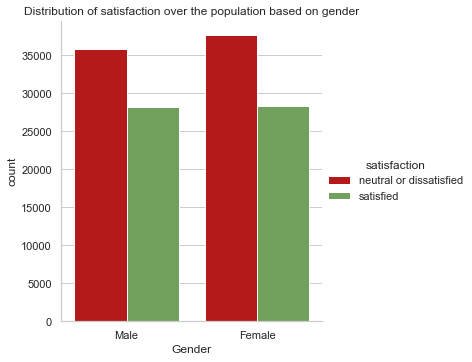

In [43]:
ax = sns.catplot(kind='count', x='Gender', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the population based on gender')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Checkin service

In [44]:
# Checkin service is an ordinal variable.
df['Checkin service'].unique()

array([4, 1, 3, 5, 2, 0])

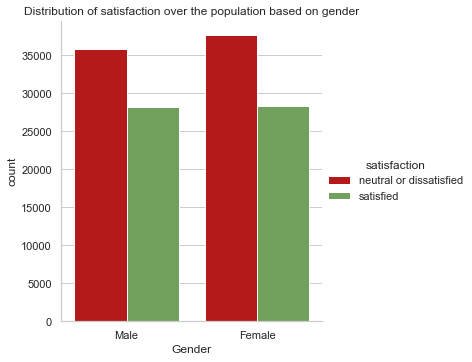

In [45]:
ax = sns.catplot(kind='count', x='Gender', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the population based on gender')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Inflight service

In [46]:
# Inflight service is an ordinal variable.
df['Inflight service'].unique()

array([5, 4, 3, 1, 2, 0])

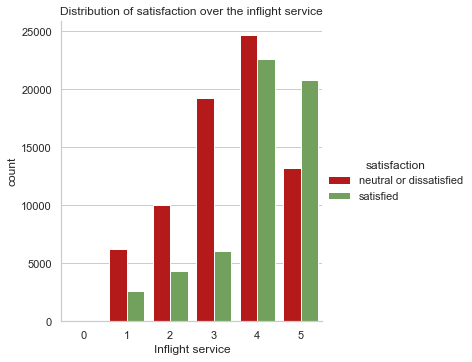

In [47]:
ax = sns.catplot(kind='count', x='Inflight service', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the inflight service')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Cleanliness

In [48]:
# Cleanliness is an ordinal variable.
df['Cleanliness'].unique()

array([5, 1, 2, 3, 4, 0])

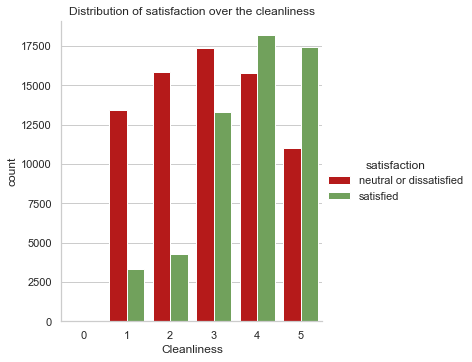

In [49]:
ax = sns.catplot(kind='count', x='Cleanliness', hue = 'satisfaction',data=df).set(title='Distribution of satisfaction over the cleanliness')

In the pipeline, we will need to transform this variable with an One Hot Encoder.

### Departure Delay in Minutes

In [50]:
# Departure Delay in Minutes is a discret variable.
df['Departure Delay in Minutes'].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

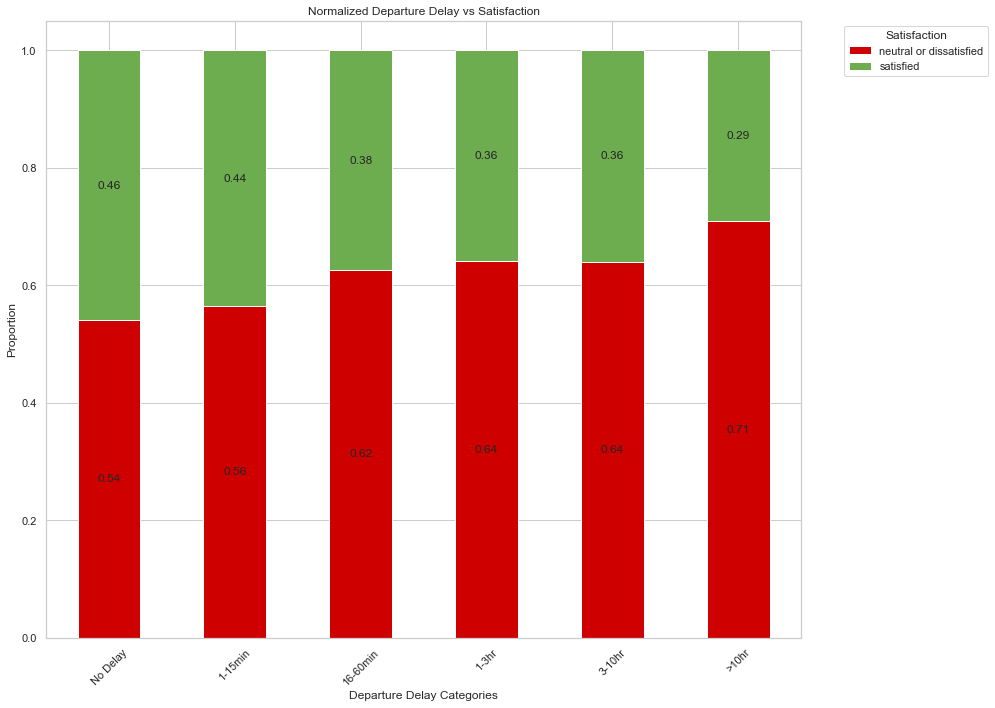

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it contains a column named 'Departure Delay in Minutes'

# Define your bins and labels for Departure Delay Categories
bins = [-1, 0, 15, 60, 180, 600, float('inf')]
labels = ['No Delay', '1-15min', '16-60min', '1-3hr', '3-10hr', '>10hr']
df['Departure Delay Categories'] = pd.cut(df['Departure Delay in Minutes'], bins=bins, labels=labels)

# Cross-tabulation
cross_tab_departure = pd.crosstab(df['Departure Delay Categories'], df['satisfaction'])

# Normalize the cross-tabulation
cross_tab_normalized = cross_tab_departure.div(cross_tab_departure.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(14, 10))  # Increased figure size
ax = cross_tab_normalized.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Normalized Departure Delay vs Satisfaction')
plt.xlabel('Departure Delay Categories')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Moving the legend outside of the plot
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()


In the pipeline, we will need to transform this column with MinMaxScaler.

### Arrival Delay in Minutes

In [52]:
# Arrival Delay in Minutes is a discret variable.
df['Arrival Delay in Minutes'].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

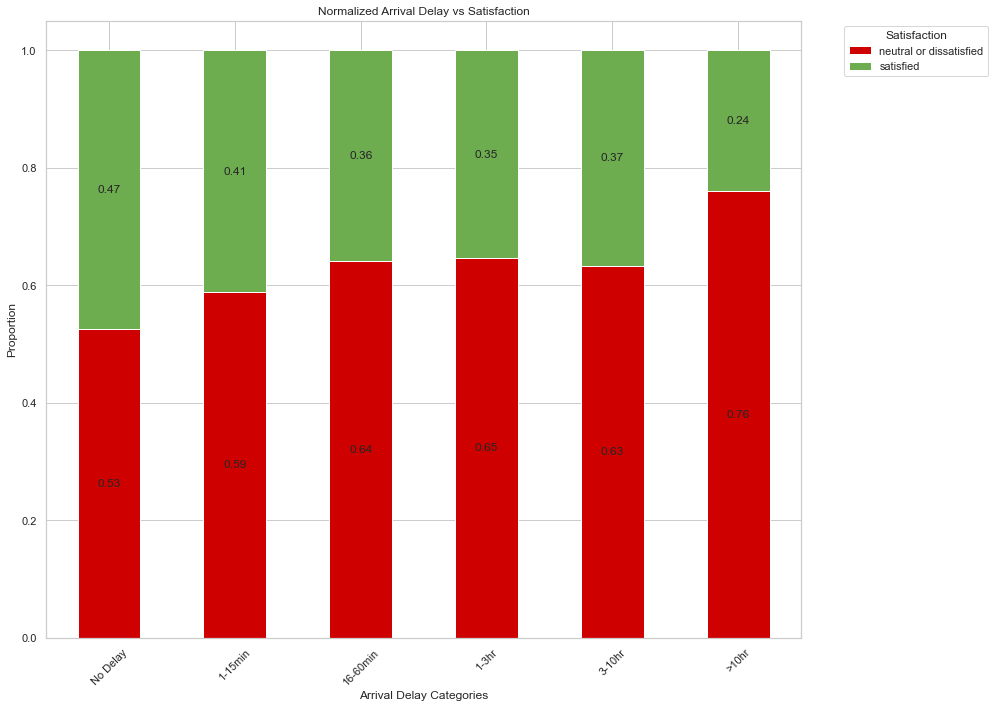

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your bins and labels for Arrival Delay Categories
bins = [-1, 0, 15, 60, 180, 600, float('inf')]
labels = ['No Delay', '1-15min', '16-60min', '1-3hr', '3-10hr', '>10hr']
df['Arrival Delay Categories'] = pd.cut(df['Arrival Delay in Minutes'], bins=bins, labels=labels)

# Cross-tabulation
cross_tab_arrival = pd.crosstab(df['Arrival Delay Categories'], df['satisfaction'])

# Normalize the cross-tabulation
cross_tab_normalized = cross_tab_arrival.div(cross_tab_arrival.sum(axis=1), axis=0)

# Plotting
plt.figure(figsize=(14, 10))  # Increased figure size
ax = cross_tab_normalized.plot(kind='bar', stacked=True, ax=plt.gca())

plt.title('Normalized Arrival Delay vs Satisfaction')
plt.xlabel('Arrival Delay Categories')
plt.ylabel('Proportion')
plt.xticks(rotation=45)

# Moving the legend outside of the plot
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()


In the pipeline, we will need to transform this column with MinMaxScaler.

**Correlation Matrix**

The select_dtypes method is used to create a new DataFrame numeric_df that includes only numeric columns. This ensures that corr() is called on a DataFrame with numeric data only.
The heatmap  displays correlations between numeric features, including the newly added satisfaction_numeric column.

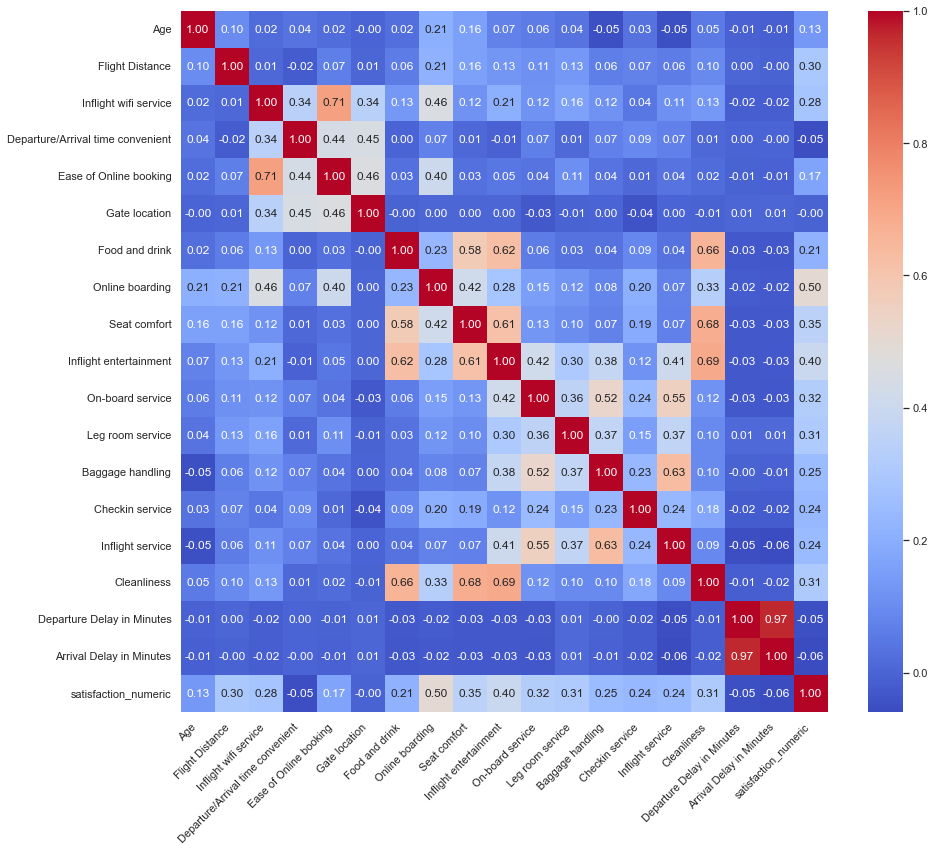

In [54]:
# First, encode the satisfaction variable numerically if it's not already
satisfaction_mapping = {'satisfied': 1, 'neutral or dissatisfied': 0}
df['satisfaction_numeric'] = df['satisfaction'].map(satisfaction_mapping)

# Select only numeric data for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Adjust the aspect of the plot to fit the annotations
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()


ANOVA analysis

In [55]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt


# Convert 'satisfaction' to a numerical code 
df['satisfaction_code'] = df['satisfaction'].astype('category').cat.codes

# Identify all the numerical columns for ANOVA, exclude 'id' since it's just an identifier
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Initialize lists to store feature names and ANOVA tables
feature_names = []
anova_tables = []

# Loop through each numerical feature and perform ANOVA
for column in numerical_columns:
    # Define the model formula
    formula = f'Q("{column}") ~ C(satisfaction_code)'

    # Fit the model
    model = ols(formula, data=df).fit()

    # Perform ANOVA and store the entire ANOVA table
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Store feature name and ANOVA table
    feature_names.append(column)
    anova_tables.append(anova_table)

# Print ANOVA statistics for each feature
for feature_name, anova_table in zip(feature_names, anova_tables):
    print(f"ANOVA for '{feature_name}':")
    print(anova_table)
    print("\n")


ANOVA for 'Age':
                            sum_sq        df            F  PR(>F)
C(satisfaction_code)  5.338344e+05       1.0  2378.024191     0.0
Residual              2.915586e+07  129878.0          NaN     NaN


ANOVA for 'Flight Distance':
                            sum_sq        df             F  PR(>F)
C(satisfaction_code)  1.148162e+10       1.0  12665.660936     0.0
Residual              1.177365e+11  129878.0           NaN     NaN


ANOVA for 'Inflight wifi service':
                             sum_sq        df             F  PR(>F)
C(satisfaction_code)   18441.465968       1.0  11347.420455     0.0
Residual              211073.585087  129878.0           NaN     NaN


ANOVA for 'Departure/Arrival time convenient':
                             sum_sq        df           F        PR(>F)
C(satisfaction_code)     891.630588       1.0  383.646795  2.657334e-85
Residual              301848.468881  129878.0         NaN           NaN


ANOVA for 'Ease of Online booking':
         

**Chi-squared test of independence**

In [56]:
import pandas as pd
from scipy.stats import chi2_contingency

# List of categorical columns to test
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create a contingency table for each categorical feature
chi_squared_results = []

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df['satisfaction'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_squared_results.append((column, chi2, p))

# Print Chi-squared test results
for column, chi2, p in chi_squared_results:
    print(f"Chi-squared test results for {column}:\n")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")
    print("\n" + "="*80 + "\n")


Chi-squared test results for Gender:

Chi-squared statistic: 16.35208067667909
P-value: 5.259838493340003e-05


Chi-squared test results for Customer Type:

Chi-squared statistic: 4493.188803283598
P-value: 0.0


Chi-squared test results for Type of Travel:

Chi-squared statistic: 26282.520993423812
P-value: 0.0


Chi-squared test results for Class:

Chi-squared statistic: 32906.17185866312
P-value: 0.0




#### Impute data for Arrival Delay in Minutes

There are 129880-129487 = 393 missing values.

In [57]:
# Index with the missing values.
index = df['Arrival Delay in Minutes'].index[df['Arrival Delay in Minutes'].apply(np.isnan)]
#df.iloc[index]

In [58]:
df3 = df.copy()
for i in range (len(df)) :
    if i in index :
        df3 = df3.drop(i, axis=0)

df3 = df3.reset_index(drop=True)
df3

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay Categories,Arrival Delay Categories,satisfaction_numeric,satisfaction_code
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,5,5,25,18.0,neutral or dissatisfied,16-60min,16-60min,0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,4,1,1,6.0,neutral or dissatisfied,1-15min,1-15min,0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,4,5,0,0.0,satisfied,No Delay,No Delay,1,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,1,4,2,11,9.0,neutral or dissatisfied,1-15min,1-15min,0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,3,0,0.0,satisfied,No Delay,No Delay,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,5,4,0,0.0,neutral or dissatisfied,No Delay,No Delay,0,0
129483,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,5,5,4,0,0.0,satisfied,No Delay,No Delay,1,1
129484,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,5,4,2,0,0.0,neutral or dissatisfied,No Delay,No Delay,0,0
129485,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,5,4,0,0.0,satisfied,No Delay,No Delay,1,1


In [59]:
df3['Departure Delay - Arrival Delay'] = df3['Departure Delay in Minutes'] - df3['Arrival Delay in Minutes']
df3['Departure Delay - Arrival Delay'].mean()

-0.4477437889517867

Since 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' are all integers, we want to impute the missing values with integers.

If we round to make an integer, we have that df3['Departure Delay - Arrival Delay'].mean() = 0

We can therefore assume that 'Departure Delay in Minutes' = 'Arrival Delay in Minutes'

In [60]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'])
#df.iloc[index]

### Word to numbers

In [61]:
def GENDER(df) :
        df.loc[df['Gender'] == 'Male', 'Gender'] = 0
        df.loc[df['Gender'] == 'Female', 'Gender'] = 1
        df['Gender'] = df['Gender'].astype(int)
        return df

def CUSTMER_TYPE(df) :
        df.loc[df['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 0
        df.loc[df['Customer Type'] == 'Loyal Customer', 'Customer Type'] = 1
        df['Customer Type'] = df['Customer Type'].astype(int)
        return df

def TYPE_OF_TRAVEL(df) :
        df.loc[df['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = 0
        df.loc[df['Type of Travel'] == 'Business travel', 'Type of Travel'] = 1
        df['Type of Travel'] = df['Type of Travel'].astype(int)
        return df

def CLASS(df) :
        df.loc[df['Class'] == 'Eco', 'Class'] = 0
        df.loc[df['Class'] == 'Eco Plus', 'Class'] = 1
        df.loc[df['Class'] == 'Business', 'Class'] = 2
        df['Class'] = df['Class'].astype(int)
        return df

def SATISFACTION(df) :
        df.loc[df['satisfaction'] == 'satisfied', 'satisfaction'] = 0
        df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'satisfaction'] = 1
        df['satisfaction'] = df['satisfaction'].astype(int)
        return df

In [62]:
GENDER(df)
CUSTMER_TYPE(df)
TYPE_OF_TRAVEL(df)
CLASS(df)
SATISFACTION(df)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Departure Delay Categories,Arrival Delay Categories,satisfaction_numeric,satisfaction_code
0,0,1,13,0,1,460,3,4,3,1,...,4,5,5,25,18.0,1,16-60min,16-60min,0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,4,1,1,6.0,1,1-15min,1-15min,0,0
2,1,1,26,1,2,1142,2,2,2,2,...,4,4,5,0,0.0,0,No Delay,No Delay,1,1
3,1,1,25,1,2,562,2,5,5,5,...,1,4,2,11,9.0,1,1-15min,1-15min,0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,3,0,0.0,0,No Delay,No Delay,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0,0,34,1,2,526,3,3,3,1,...,4,5,4,0,0.0,1,No Delay,No Delay,0,0
129876,0,1,23,1,2,646,4,4,4,4,...,5,5,4,0,0.0,0,No Delay,No Delay,1,1
129877,1,1,17,0,0,828,2,5,1,5,...,5,4,2,0,0.0,1,No Delay,No Delay,0,0
129878,0,1,14,1,2,1127,3,3,3,3,...,4,5,4,0,0.0,0,No Delay,No Delay,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  int64   
 1   Customer Type                      129880 non-null  int64   
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  int64   
 4   Class                              129880 non-null  int64   
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  int64   
 7   Departure/Arrival time convenient  129880 non-null  int64   
 8   Ease of Online booking             129880 non-null  int64   
 9   Gate location                      129880 non-null  int64   
 10  Food and drink                     129880 non-null  int64   
 11  Online boarding           

In [64]:
TARGET = ["satisfaction"]
DISCRET = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
REVIEW_VARIABLES = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 
                    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 
                    'Checkin service', 'Inflight service', 'Cleanliness']
OTHER_VARIABLES = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
CATEGORICAL = REVIEW_VARIABLES + OTHER_VARIABLES
PREDICTORS =  DISCRET + CATEGORICAL

### Quantitative features

In [65]:
df.loc[:, DISCRET].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.160102
std,15.119360,997.452477,38.071126,38.599601
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,844.000000,0.000000,0.000000
75%,51.000000,1744.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


### Target

<AxesSubplot:>

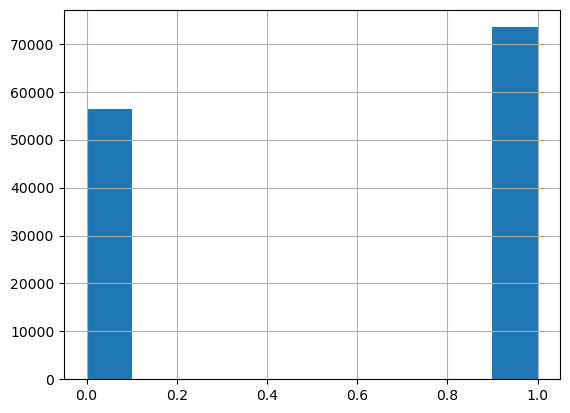

In [66]:
sns.reset_defaults()

df['satisfaction'].hist()

### Predictors

- **Discrete**: `Age`, `Flight Distance`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`<br><br>

- **Categorical**: `Gender`, `Customer Type`,`Type of Travel`, `Class`, `Inflight wifi service`, `Departure/Arrival time convenient`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, `Cleanliness`, `latitude`, `longitude`, `rating`, `accuracy`, `cleanliness`, `checkin`, `communication`, `location`, `value`, `reviews_per_month`


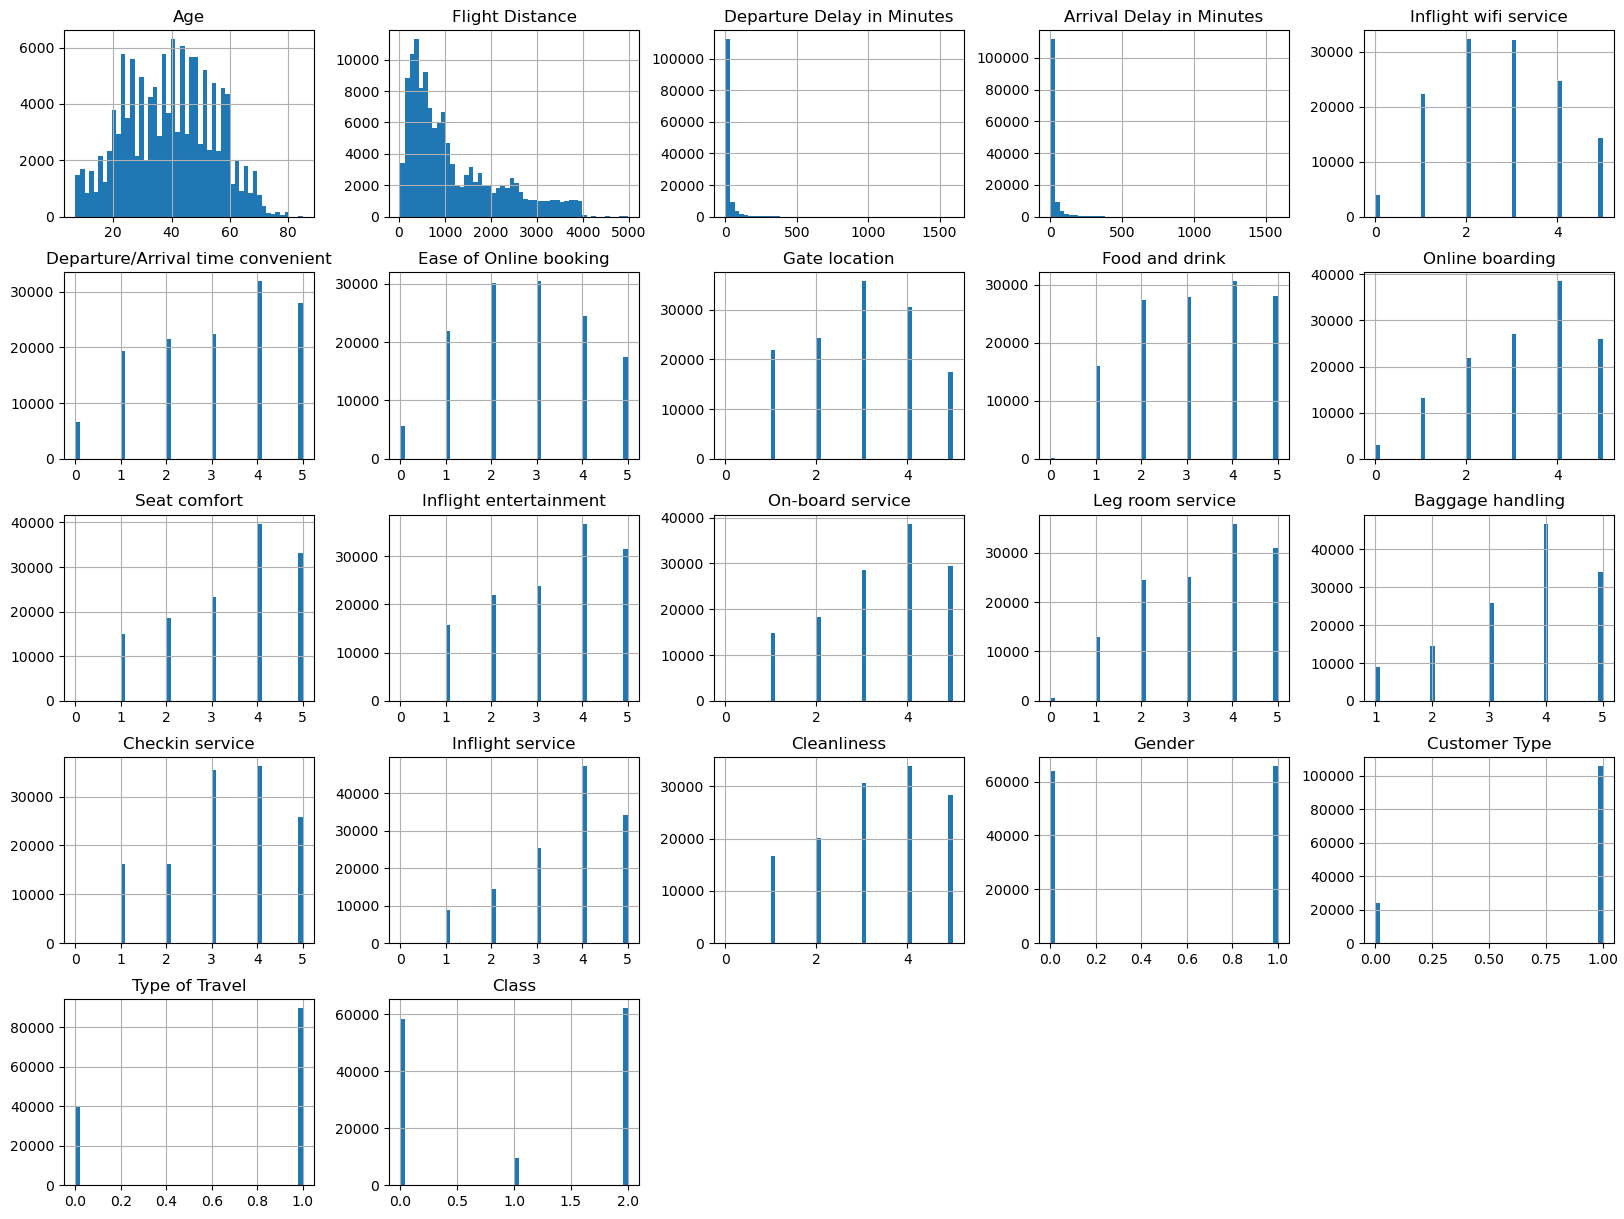

In [67]:
df.loc[:, DISCRET + CATEGORICAL].hist(bins=50, figsize=(20,15))
plt.show()

### Correlation analysis

In [68]:
corr_matrix = df.loc[:, TARGET + DISCRET].corr(method='pearson')
corr_matrix['satisfaction'].sort_values(ascending=False)

satisfaction                  1.000000
Arrival Delay in Minutes      0.057943
Departure Delay in Minutes    0.050740
Age                          -0.134091
Flight Distance              -0.298085
Name: satisfaction, dtype: float64

In [69]:
corr_matrix = df.loc[:, TARGET + REVIEW_VARIABLES].corr(method='pearson')
corr_matrix['satisfaction'].sort_values(ascending=False)

satisfaction                         1.000000
Departure/Arrival time convenient    0.054270
Gate location                        0.002793
Ease of Online booking              -0.168877
Food and drink                      -0.211340
Checkin service                     -0.237252
Inflight service                    -0.244918
Baggage handling                    -0.248680
Inflight wifi service               -0.283460
Cleanliness                         -0.307035
Leg room service                    -0.312424
On-board service                    -0.322205
Seat comfort                        -0.348829
Inflight entertainment              -0.398234
Online boarding                     -0.501749
Name: satisfaction, dtype: float64

In [70]:
corr_matrix = df.loc[:, TARGET + OTHER_VARIABLES].corr(method='pearson')
corr_matrix['satisfaction'].sort_values(ascending=False)

satisfaction      1.000000
Gender            0.011236
Customer Type    -0.186017
Type of Travel   -0.449861
Class            -0.492947
Name: satisfaction, dtype: float64

`Online boarding`, `Class`, `Type of Travel` and `Inflight entertainment` are the features that are the most correlated with satisfaction.

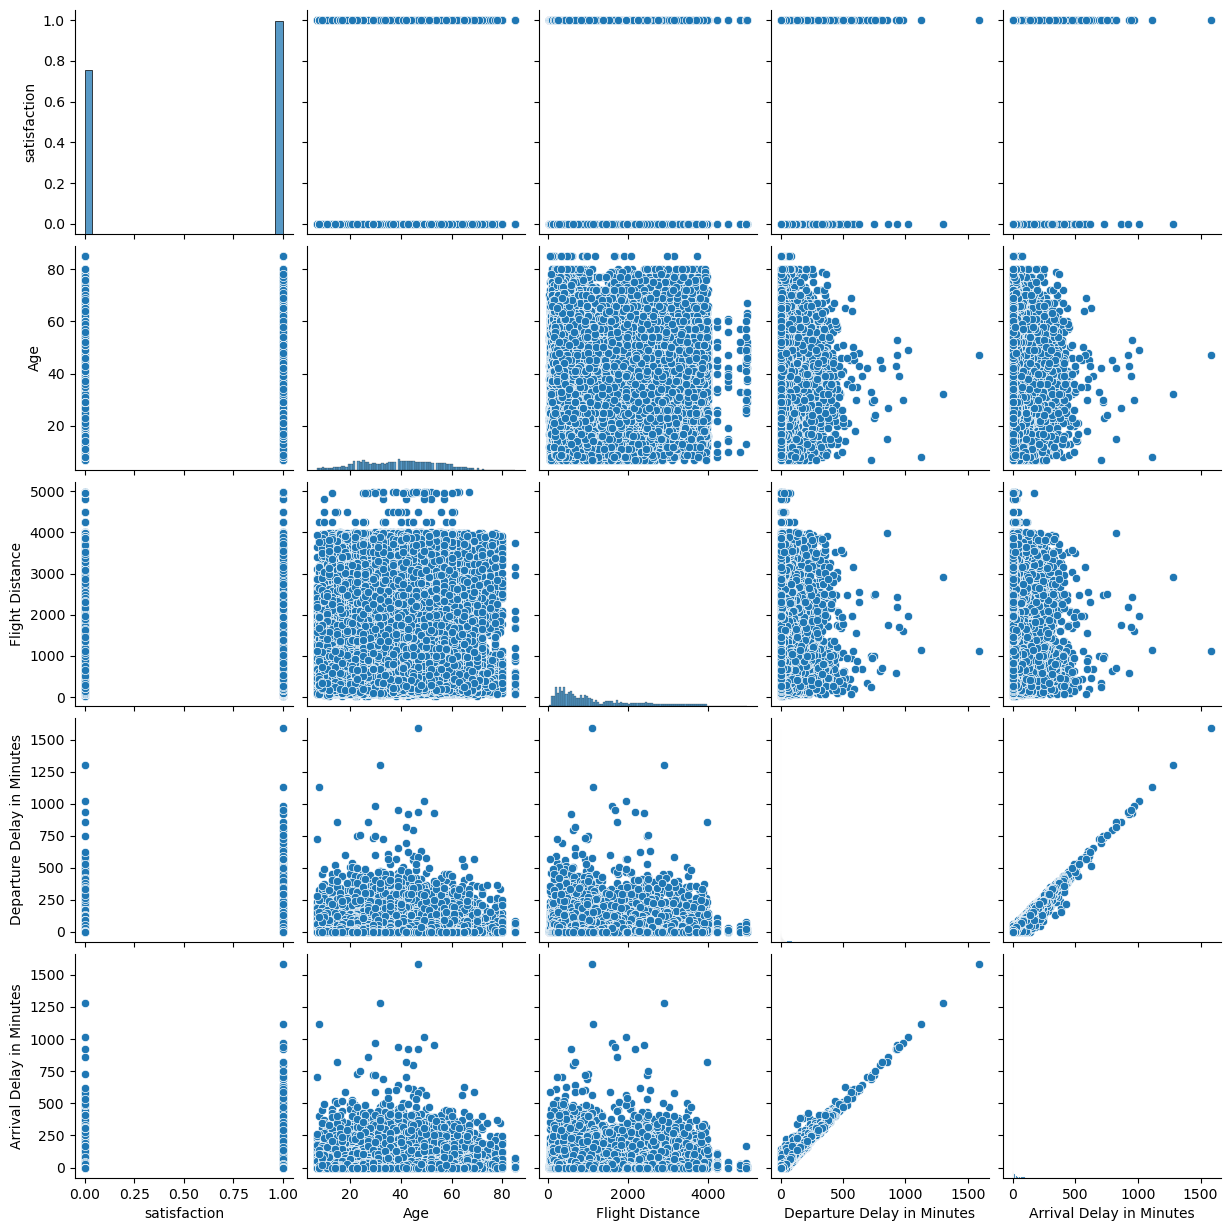

In [71]:
sns.pairplot(data=df.loc[:, TARGET + DISCRET])
plt.show()

There are no major patterns in the discret variables, although we can begin to see some clusters of insatisfaction at when `Departure Delay in Minutes` are `Arrival Delay in Minutes` high.

In [72]:
X = df[PREDICTORS]
y = df[TARGET]

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (103904, 22)
X_test.shape: (25976, 22)
y_train.shape: (103904, 1)
y_test.shape: (25976, 1)


satisfaction
1               58762
0               45142
dtype: int64

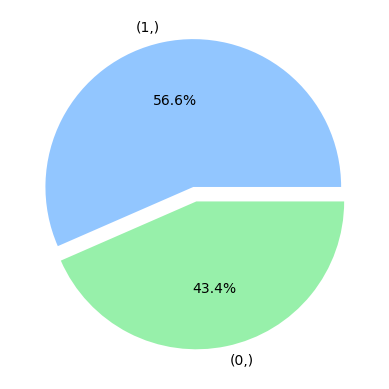

In [74]:
check_data_balance(y_train)

satisfaction
1               14690
0               11286
dtype: int64

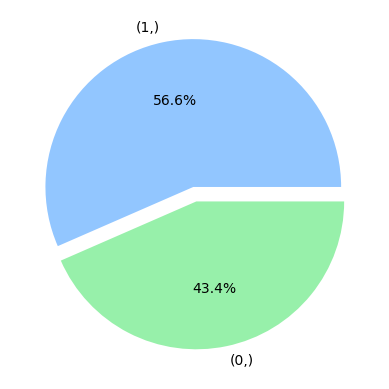

In [75]:
check_data_balance(y_test)

### Pipeline

In [76]:
from sklearn.pipeline import Pipeline #each pipeline can have multiple steps
from sklearn.compose import ColumnTransformer #for selecting specific columns and transforming them with individual pipelines
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, FunctionTransformer #specific transformations we want to use in our pipelines

# Categorical - One hot encode
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, CATEGORICAL)]

# Numerical - scale
num_scl_step = ('scl', MinMaxScaler(feature_range=(0,1)))
num_steps = [num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, DISCRET)]


pipeline_full = ColumnTransformer([
    ("categorical", cat_pipe, CATEGORICAL),
    ("numerical", num_pipe, DISCRET),
])

In [77]:
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)
print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")

X_train_transformed.shape: (103904, 96)
X_test_transformed.shape: (25976, 96)


In [78]:
# Names of the columns
pipeline_full.get_feature_names_out()

array(['categorical__Inflight wifi service_0',
       'categorical__Inflight wifi service_1',
       'categorical__Inflight wifi service_2',
       'categorical__Inflight wifi service_3',
       'categorical__Inflight wifi service_4',
       'categorical__Inflight wifi service_5',
       'categorical__Departure/Arrival time convenient_0',
       'categorical__Departure/Arrival time convenient_1',
       'categorical__Departure/Arrival time convenient_2',
       'categorical__Departure/Arrival time convenient_3',
       'categorical__Departure/Arrival time convenient_4',
       'categorical__Departure/Arrival time convenient_5',
       'categorical__Ease of Online booking_0',
       'categorical__Ease of Online booking_1',
       'categorical__Ease of Online booking_2',
       'categorical__Ease of Online booking_3',
       'categorical__Ease of Online booking_4',
       'categorical__Ease of Online booking_5',
       'categorical__Gate location_0', 'categorical__Gate location_1',
     

### Threshold

A reason that could motivate airlines to do this kind of analysis is to see how to increase the number of satisfied customers. So in this case, we would like to increase the detection of dissatisfied customers. This means increasing recall. To do that, we will lower the threshold to 0.4 (by default the threshold is 0.5)

In [79]:
Threshold=0.4

### Random Forest classifier

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as rfc

param_grid = {
    'n_estimators' : [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [35, 40, 45],
    'min_samples_leaf': [20, 25, 30]
}

grid_search_RFC = GridSearchCV(estimator=rfc(), 
                               param_grid=param_grid,
                               scoring='roc_auc',
                               n_jobs=-1,
                               cv=5,
                               error_score='raise')

In [81]:
grid_search_RFC.fit(X=X_train_transformed, y=np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [35, 40, 45],
                         'min_samples_leaf': [20, 25, 30],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [82]:
print(grid_search_RFC.best_params_)
print("\n", "Best Parameters:", grid_search_RFC.best_estimator_)

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 20, 'n_estimators': 150}

 Best Parameters: RandomForestClassifier(criterion='entropy', max_depth=35, min_samples_leaf=20,
                       n_estimators=150)


In [83]:
model_RFC = grid_search_RFC.best_estimator_

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_proba_RFC = model_RFC.predict_proba(X_test_transformed)
y_pred_RFC = (y_pred_proba_RFC[:,1] >= Threshold).astype('int')

print(f"precision_score: {precision_score(y_test, y_pred_RFC)}")
print(f"recall_score: {recall_score(y_test, y_pred_RFC)}")
print(f"f1_score: {f1_score(y_test, y_pred_RFC)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba_RFC[:,1])}")
print(f"accuracy: {accuracy_score(y_test, y_pred_RFC)}")

precision_score: 0.928164779632828
recall_score: 0.9877467665078284
f1_score: 0.957029317679649
roc_auc_score: 0.9918126483566634
accuracy: 0.9498383122882661


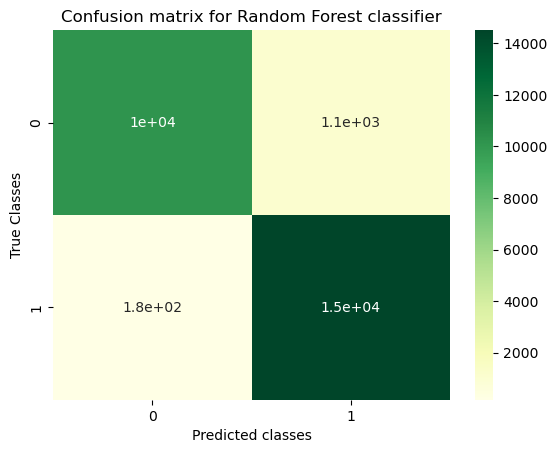

In [85]:
from sklearn.metrics import confusion_matrix

plt.title('Confusion matrix for Random Forest classifier')
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [86]:
from sklearn.metrics import classification_report

# performance evaluation metrics
print(classification_report(y_pred_RFC, y_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10343
           1       0.99      0.93      0.96     15633

    accuracy                           0.95     25976
   macro avg       0.94      0.96      0.95     25976
weighted avg       0.95      0.95      0.95     25976



### Gradient Boosting Classifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier as gbc

param_grid = {
    'loss' : ['log_loss', 'exponential'],
    'n_estimators' : [3, 5, 8, 10],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [20, 25, 30]
}

grid_search_GBC = GridSearchCV(estimator=gbc(), 
                               param_grid=param_grid,
                               scoring='roc_auc',
                               n_jobs=-1,
                               cv=5)

In [88]:
grid_search_GBC.fit(X=X_train_transformed, y=np.ravel(y_train))

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [5, 10, 15],
                         'min_samples_leaf': [20, 25, 30],
                         'n_estimators': [3, 5, 8, 10]},
             scoring='roc_auc')

In [89]:
print(grid_search_GBC.best_params_)
print("\n", "Best Parameters:", grid_search_GBC.best_estimator_)

{'criterion': 'squared_error', 'loss': 'exponential', 'max_depth': 15, 'min_samples_leaf': 20, 'n_estimators': 10}

 Best Parameters: GradientBoostingClassifier(criterion='squared_error', loss='exponential',
                           max_depth=15, min_samples_leaf=20, n_estimators=10)


In [90]:
model_GBC = grid_search_GBC.best_estimator_

In [91]:
y_pred_proba_GBC = model_GBC.predict_proba(X_test_transformed)
y_pred_GBC = (y_pred_proba_GBC[:,1] >= Threshold).astype('int')

print(f"precision_score: {precision_score(y_test, y_pred_GBC)}")
print(f"recall_score: {recall_score(y_test, y_pred_GBC)}")
print(f"f1_score: {f1_score(y_test, y_pred_GBC)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba_GBC[:,1])}")
print(f"accuracy: {accuracy_score(y_test, y_pred_GBC)}")

precision_score: 0.9381736043885124
recall_score: 0.9895847515316541
f1_score: 0.9631936392247805
roc_auc_score: 0.9935012076022789
accuracy: 0.9572297505389591


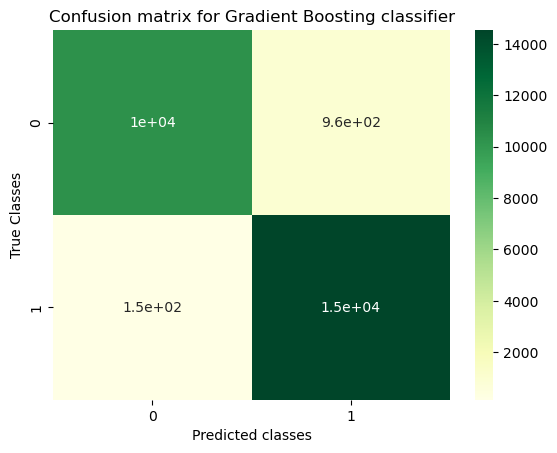

In [92]:
plt.title('Confusion matrix for Gradient Boosting classifier')
sns.heatmap(confusion_matrix(y_test, y_pred_GBC), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [93]:
#performance evaluation metrics
print(classification_report(y_pred_GBC, y_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10481
           1       0.99      0.94      0.96     15495

    accuracy                           0.96     25976
   macro avg       0.95      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



### Logistic regression

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as lr

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [500, 1000, 2000] # Increased max_iter

}

grid_search_LR = GridSearchCV(estimator=lr(),
                              param_grid=param_grid,
                              scoring='roc_auc',
                              n_jobs=-1,
                              cv=5)

In [95]:
grid_search_LR.fit(X_train_transformed, np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'max_iter': [500, 1000, 2000]},
             scoring='roc_auc')

In [96]:
print(grid_search_LR.best_params_)
print("\n", "Best Parameters:", grid_search_LR.best_estimator_)

{'C': 10, 'max_iter': 500}

 Best Parameters: LogisticRegression(C=10, max_iter=500)


In [97]:
model_LR = grid_search_LR.best_estimator_

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_proba_LR = model_LR.predict_proba(X_test_transformed)
y_pred_LR = (y_pred_proba_LR[:,1] >= Threshold).astype('int')

print(f"precision_score: {precision_score(y_test, y_pred_LR)}")
print(f"recall_score: {recall_score(y_test, y_pred_LR)}")
print(f"f1_score: {f1_score(y_test, y_pred_LR)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba_LR[:,1])}")
print(f"accuracy: {accuracy_score(y_test, y_pred_LR)}")

precision_score: 0.9201325708344165
recall_score: 0.9638529611980939
f1_score: 0.9414854711084514
roc_auc_score: 0.9793943941824707
accuracy: 0.932245149368648


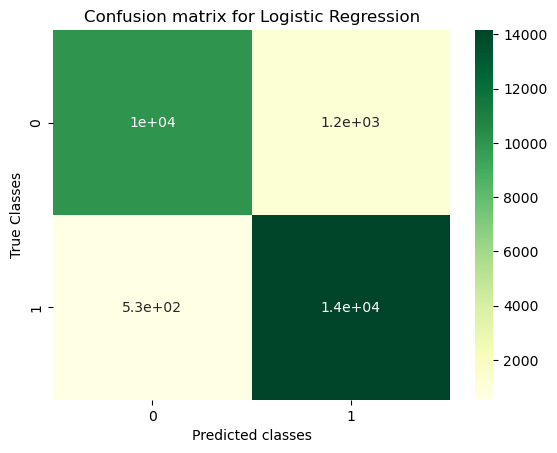

In [99]:
from sklearn.metrics import confusion_matrix

plt.title('Confusion matrix for Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [100]:
from sklearn.metrics import classification_report

# performance evaluation metrics
print(classification_report(y_pred_LR, y_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10588
           1       0.96      0.92      0.94     15388

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



### K Neighbors Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier as knc

param_grid = {
    'n_neighbors': [3, 5, 7],  # Reduced to 3 options: 3, 5, 7 neighbors
    'weights': ['uniform', 'distance'],  # Keeping both options as they significantly alter the model's behavior
}

grid_search_KNC = GridSearchCV(estimator=knc(metric = 'euclidean'),
                              param_grid=param_grid,
                              scoring='roc_auc',
                              n_jobs=-1,
                              cv=5)

In [102]:
grid_search_KNC.fit(X_train_transformed, np.ravel(y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='euclidean'),
             n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [103]:
print(grid_search_KNC.best_params_)
print("\n", "Best Parameters:", grid_search_KNC.best_estimator_)

{'n_neighbors': 7, 'weights': 'distance'}

 Best Parameters: KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='distance')


In [104]:
model_KNC = grid_search_KNC.best_estimator_

In [105]:
y_pred_proba_KNC = model_KNC.predict_proba(X_test_transformed)
y_pred_KNC = (y_pred_proba_KNC[:,1] >= Threshold).astype('int')

print(f"precision_score: {precision_score(y_test, y_pred_KNC)}")
print(f"recall_score: {recall_score(y_test, y_pred_KNC)}")
print(f"f1_score: {f1_score(y_test, y_pred_KNC)}")
print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba_KNC[:,1])}")
print(f"accuracy: {accuracy_score(y_test, y_pred_KNC)}")

precision_score: 0.9220804207015969
recall_score: 0.9787610619469026
f1_score: 0.949575669517551
roc_auc_score: 0.9817482987953412
accuracy: 0.9412149676624576


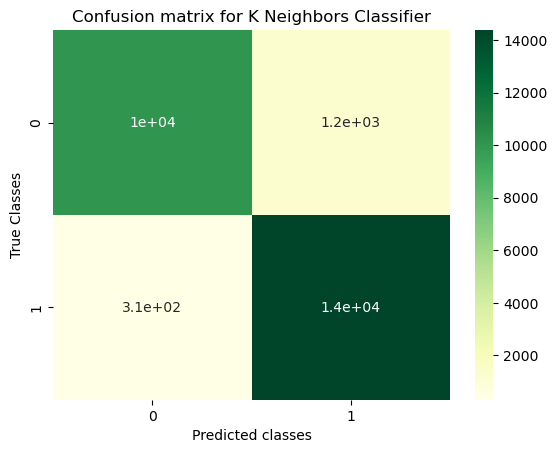

In [106]:
plt.title('Confusion matrix for K Neighbors Classifier')
sns.heatmap(confusion_matrix(y_test, y_pred_KNC), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [107]:
# performance evaluation metrics
print(classification_report(y_pred_KNC, y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     10383
           1       0.98      0.92      0.95     15593

    accuracy                           0.94     25976
   macro avg       0.94      0.95      0.94     25976
weighted avg       0.94      0.94      0.94     25976



### Learning curve

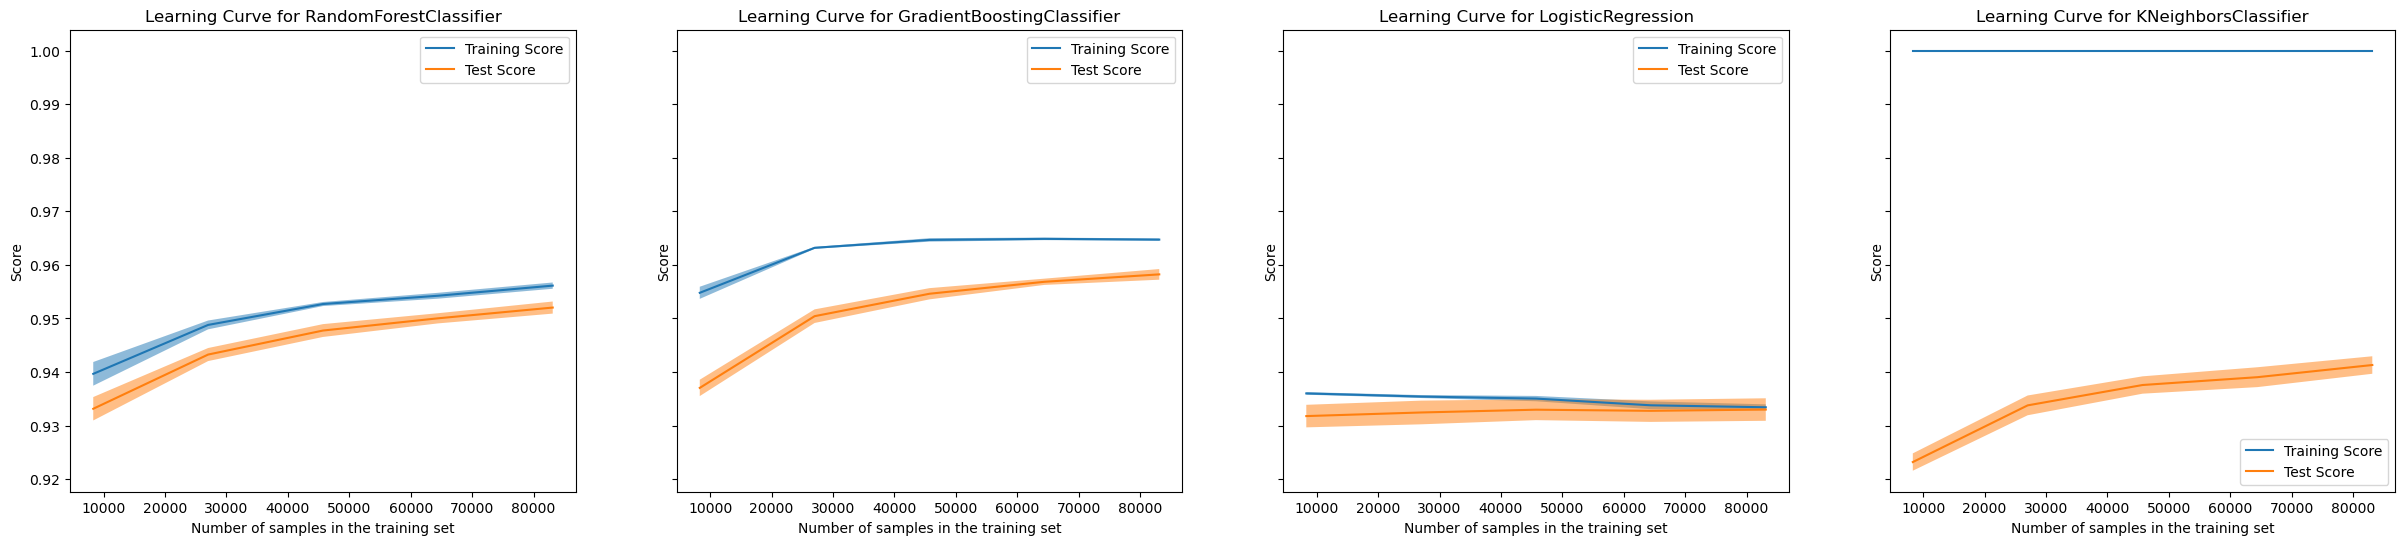

In [108]:
from sklearn.model_selection import LearningCurveDisplay
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 6), sharey=True)

for ax_idx, estimator in enumerate([model_RFC, model_GBC, model_LR, model_KNC]):
    LearningCurveDisplay.from_estimator(estimator, X=X_train_transformed, y=np.ravel(y_train), ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

According to the learning curve, Random Forest classifier and the Gradient Boosting classifier are the best models. The K Neighbors classifier model seems overfiting and the Logistic Regression seems underfitting.

### ROC Curve

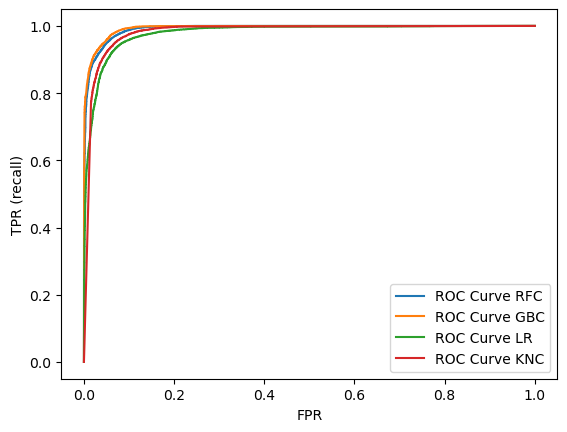

In [109]:
from sklearn.metrics import roc_curve

fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, model_RFC.predict_proba(X_test_transformed)[:, 1])
fpr_GBC, tpr_GBC, thresholds_GBC = roc_curve(y_test, model_GBC.predict_proba(X_test_transformed)[:, 1])
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, model_LR.predict_proba(X_test_transformed)[:, 1])
#fpr_DTR, tpr_DTR, thresholds_DTR = roc_curve(y_test, model_DTR.predict_proba(X_test_transformed)[:, 1])
fpr_KNC, tpr_KNC, thresholds_KNC = roc_curve(y_test, model_KNC.predict_proba(X_test_transformed)[:, 1])


plt.plot(fpr_RFC, tpr_RFC, label="ROC Curve RFC")
plt.plot(fpr_GBC, tpr_GBC, label="ROC Curve GBC")
plt.plot(fpr_LR, tpr_LR, label="ROC Curve LR")
#plt.plot(fpr_DTR, tpr_DTR, label="ROC Curve DTR")
plt.plot(fpr_KNC, tpr_KNC, label="ROC Curve KNC")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)

According to the ROC Curve, Random Forest classifier and the Gradient Boosting classifier are the best models